In [24]:
#Importiamo le librerie che ci saranno utili per lo svolgimento delle analisi
import pandas as pan #per la creazione e importazione dei dataframe
from matplotlib import pyplot as plt # per l'elaborazione dei grafici

file_name='.\Amazon_Customer_Behavior_Survey.csv'

dataset=pan.read_csv(file_name)


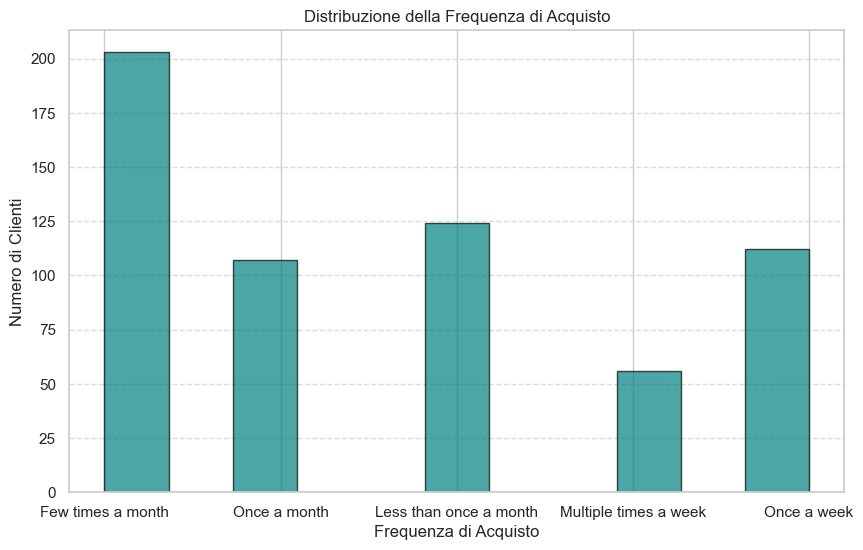

In [25]:
#Visualizziamo la distribuzione della frequenza di acquisto per capire quanto spesso i clienti effettuano acquisti

plt.figure(figsize=(10, 6))
plt.hist(dataset['Purchase_Frequency'], bins='auto', color='#008080', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della Frequenza di Acquisto')
plt.xlabel('Frequenza di Acquisto')
plt.ylabel('Numero di Clienti')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


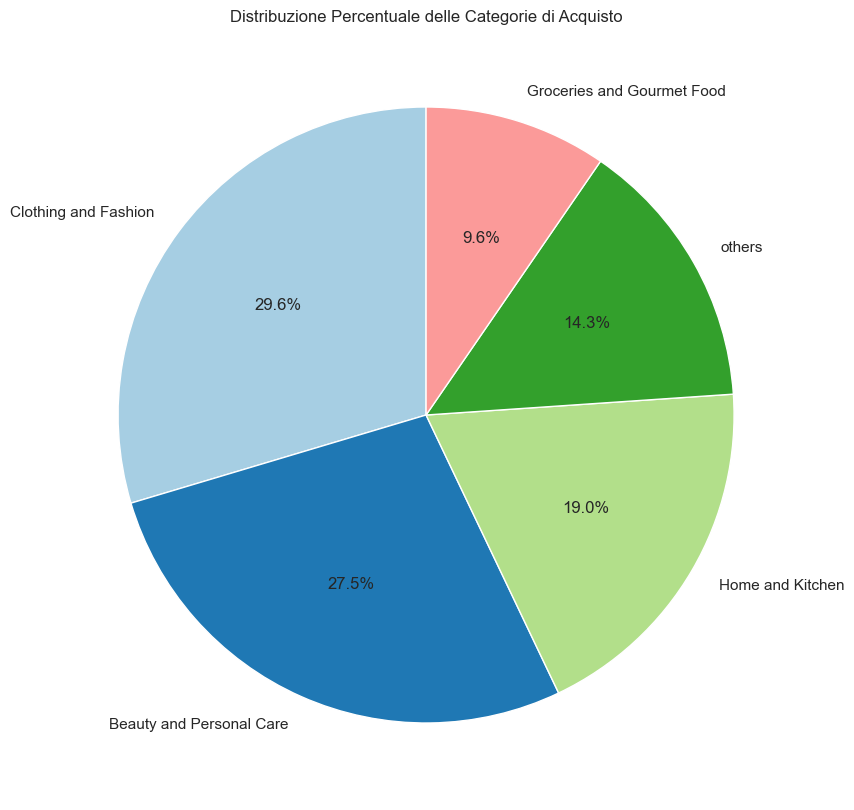

In [44]:
import pandas as pan
from matplotlib import pyplot as plt

file_name='.\Amazon_Customer_Behavior_Survey.csv'

dataset=pan.read_csv(file_name)
# Trasformazione delle categorie di acquisto multiple: alcune colonne, presentano più di una categoria nella colonna 'Purchase Categories', sicuramente quel cliente ha acquistato prodotti appartenenti
#a diverse categorie
dataset['Purchase_Categories'] = dataset['Purchase_Categories'].str.split(';')
dataset_expanded = dataset.explode('Purchase_Categories')
# Conteggio delle righe con valore equivalente di categoria di acquisto
categorie_popolari = dataset_expanded['Purchase_Categories'].value_counts()
# Visualizzazione del grafico a torta delle categorie di acquisto più popolari
plt.figure(figsize=(10, 10))
plt.pie(categorie_popolari, labels=categorie_popolari.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuzione Percentuale delle Categorie di Acquisto')
plt.show()

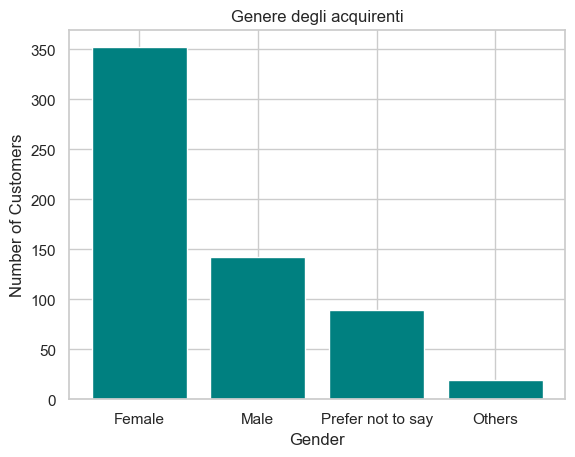

In [45]:
#Visualizza la distribuzione di acquisto per genere
gender_counts = dataset['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values,color='#008080')
plt.title('Genere degli acquirenti')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


Index(['Yes', 'No'], dtype='object', name='Review_Left')


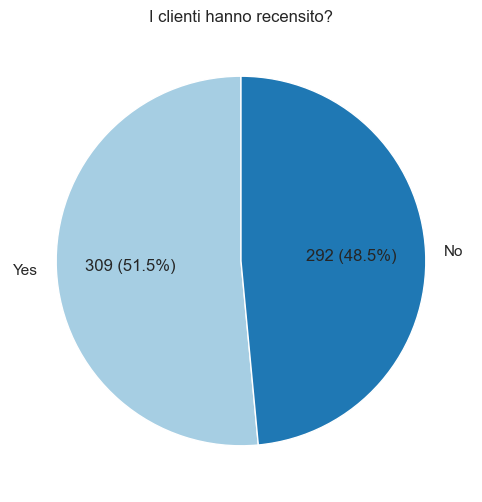

In [49]:
# Verifica se i clienti hanno lasciato la recensione
frequenza_recensioni = dataset['Review_Left'].value_counts()
label=frequenza_recensioni.index
print(label)

# Visualizzazione del grafico a torta delle frequenze delle recensioni
plt.figure(figsize=(8, 6))
plt.pie(frequenza_recensioni, labels=frequenza_recensioni.index, autopct=lambda p: f'{int(p/100*sum(frequenza_recensioni))} ({p:.1f}%)', startangle=90, colors=plt.cm.Paired.colors)
plt.title('I clienti hanno recensito?')
plt.show()

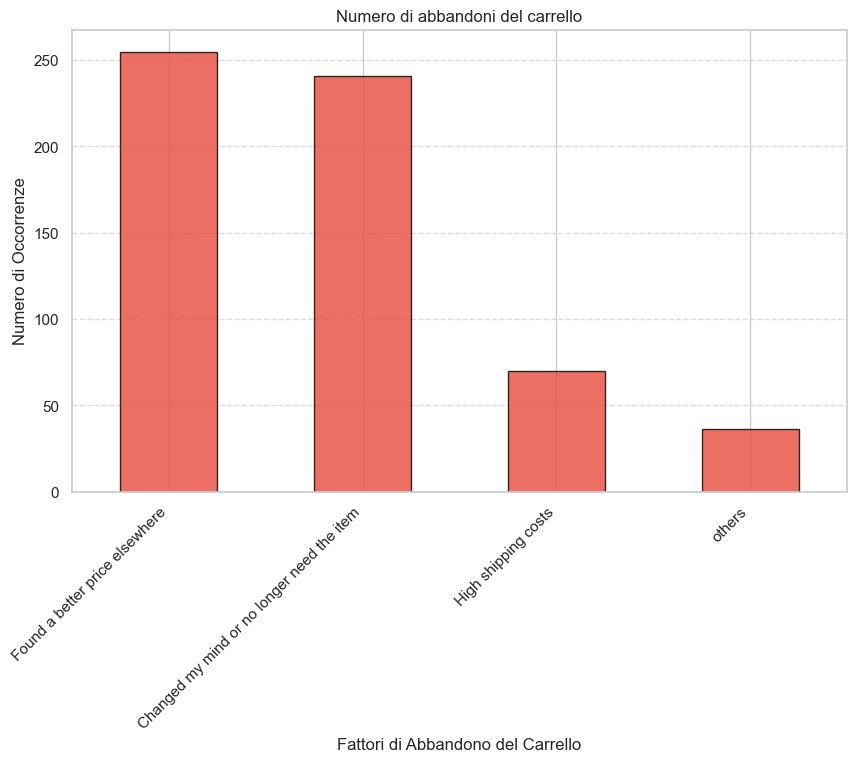

In [50]:
# Conteggio del numero di abbandoni del carrello --> i clienti mettono un oggetto nel carrello, dopodiché decidono di non acquistare, cancellando dal carrello
frequenza_abbandono_carrello = dataset['Cart_Abandonment_Factors'].value_counts()
# Visualizzazione dell'istogramma
plt.figure(figsize=(10, 6))
frequenza_abbandono_carrello.plot(kind='bar', color='#e74c3c', edgecolor='black', alpha=0.8)
plt.title('Numero di abbandoni del carrello')
plt.xlabel('Fattori di Abbandono del Carrello')
plt.ylabel('Numero di Occorrenze')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


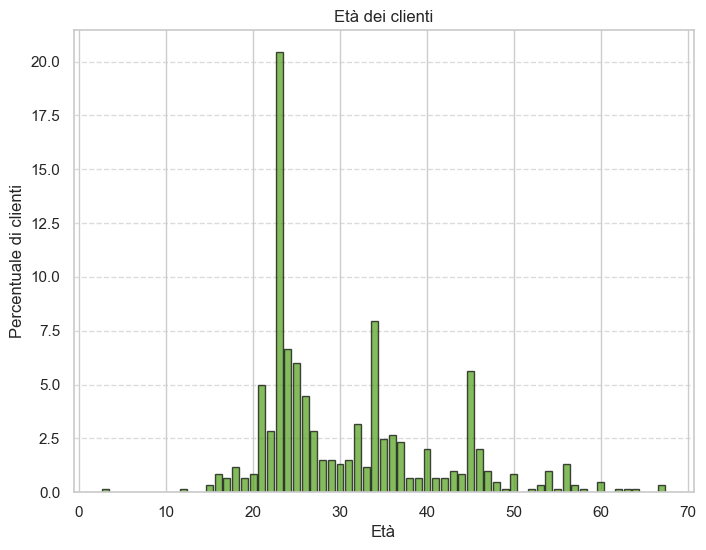

In [54]:
#Visualizza la distribuzione di acquisto per età
eta_counts = dataset['age'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(eta_counts.index, eta_counts*100/sum(eta_counts),color='#4F9E19',edgecolor='black', alpha=0.7)
plt.title('Età dei clienti')
plt.xlabel('Età')
plt.ylabel('Percentuale di clienti')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

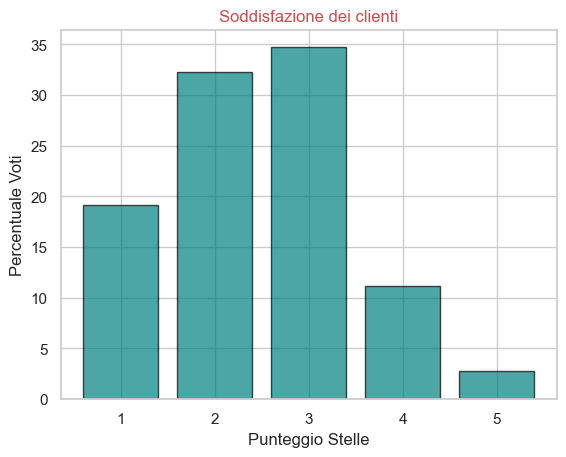

In [31]:
#Visualizza l'andamento delle recensioni relative agli acquisti
recensioni_tot=dataset['Shopping_Satisfaction'].shape
conteggio_recensioni = dataset['Shopping_Satisfaction'].value_counts().sort_index()
plt.bar(conteggio_recensioni.index, conteggio_recensioni.values*100/recensioni_tot[0], color='#008080', edgecolor='black', alpha=0.7)
plt.title('Soddisfazione dei clienti', color='r')
plt.ylabel('Percentuale Voti')
plt.xlabel('Punteggio Stelle')
plt.show()

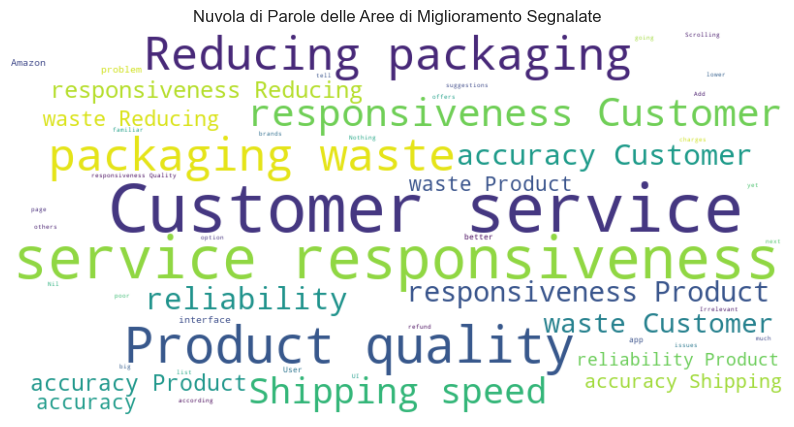

In [32]:
#Esplora le risposte dei clienti per identificare le aree di miglioramento segnalate
from wordcloud import WordCloud as wc
# Seleziona le colonne contenenti le risposte dei clienti
risposte_clienti = dataset['Improvement_Areas'].dropna()
# Unisce tutte le risposte in un'unica stringa
testo_completo = ' '.join(risposte_clienti)
# Crea una nuvola di parole
wordcloud = wc(width=800, height=400, background_color='white').generate(testo_completo)
# Visualizzazione della nuvola di parole
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvola di Parole delle Aree di Miglioramento Segnalate')
plt.show()

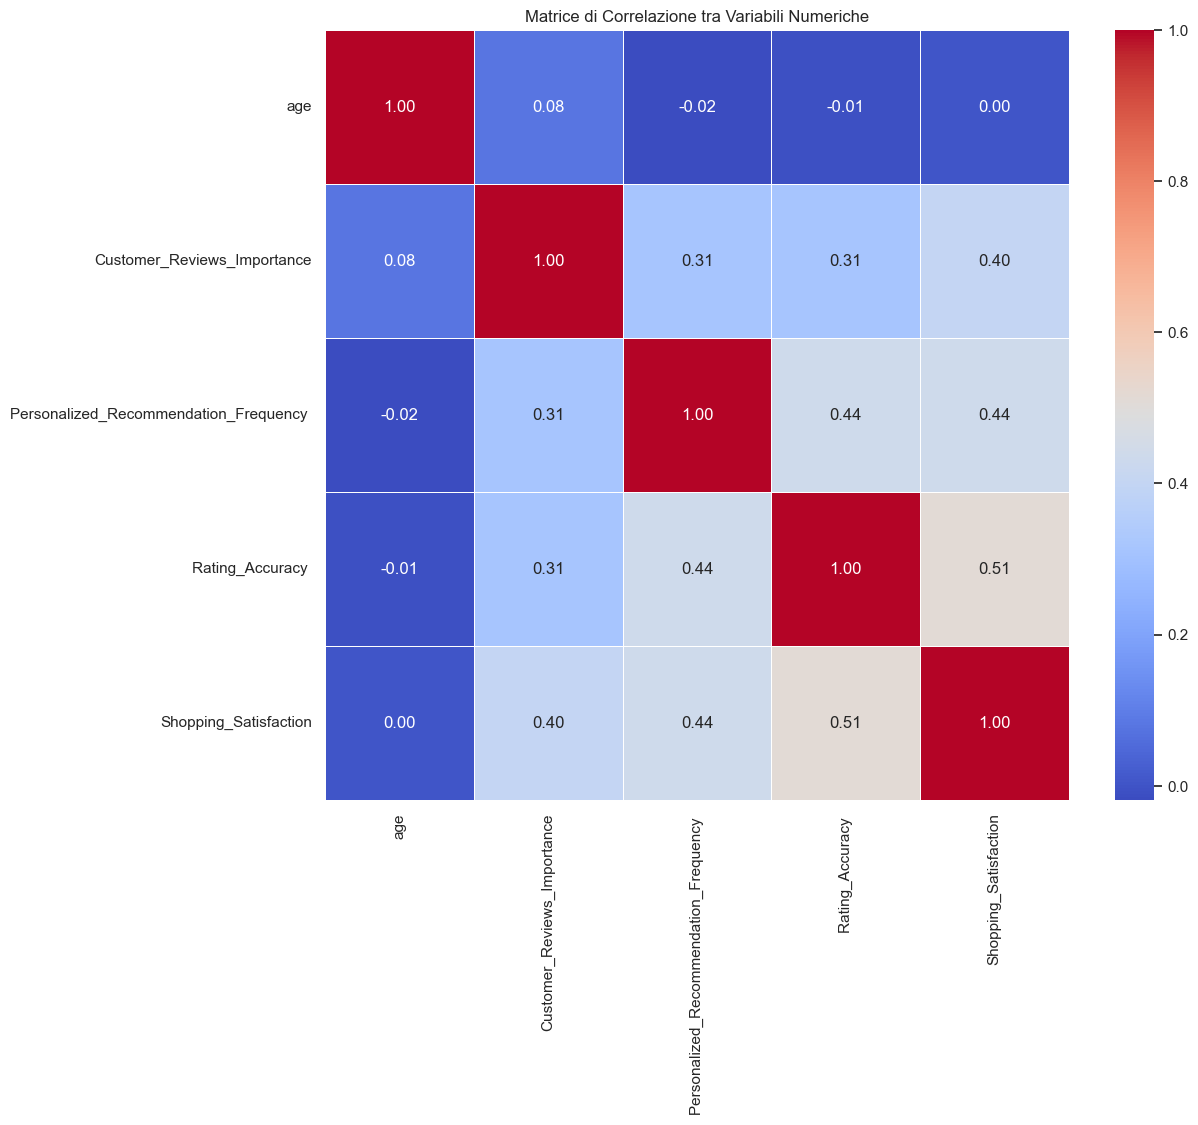

In [33]:
import seaborn as sea
# Seleziona solo le colonne numeriche
colonne_numeriche = dataset.select_dtypes(include='number').columns
# Calcola la matrice di correlazione solo per le colonne numeriche
corr_matrix = dataset[colonne_numeriche].corr()
# Crea un heatmap della matrice di correlazione
plt.figure(figsize=(12, 10))
sea.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice di Correlazione tra Variabili Numeriche')
plt.show()

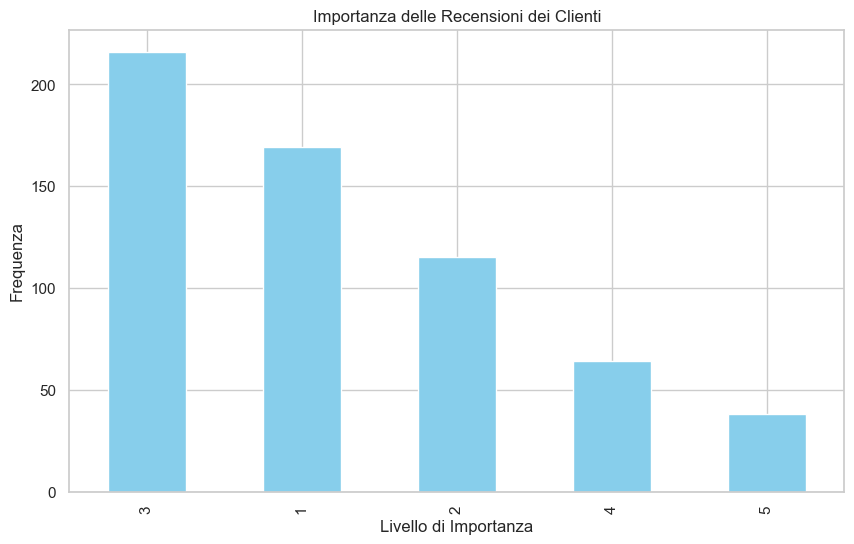

In [34]:
#ci fa capire, quanto i clienti reputino importante le recensioni degli altri clienti --> quanto si affidano alle recensioni degli altri clienti per decidere di acquistare o meno un prodotto
importance_counts = dataset['Customer_Reviews_Importance'].value_counts()
#Visualizza un grafico a barre
plt.figure(figsize=(10, 6))
importance_counts.plot(kind='bar', color='skyblue')
plt.title('Importanza delle Recensioni dei Clienti')
plt.xlabel('Livello di Importanza')
plt.ylabel('Frequenza')
plt.show()

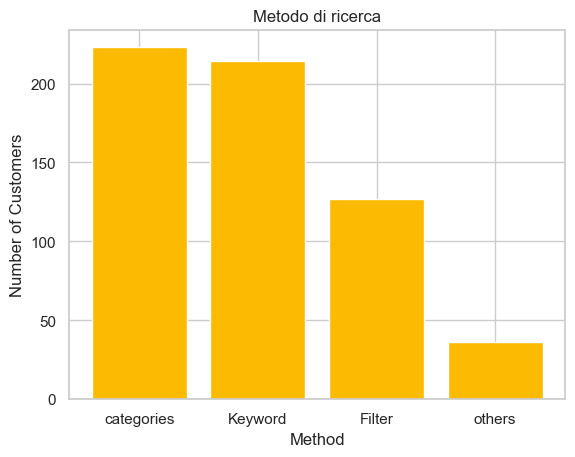

In [47]:
#Visualizza la distribuzione di acquisto per metodo --> come i clienti ricercano i prodotti che hanno acquistato
Product_Search_Method_counts = dataset['Product_Search_Method'].value_counts()
plt.bar(Product_Search_Method_counts.index, Product_Search_Method_counts.values,color='#fcba03')
plt.title('Metodo di ricerca')
plt.xlabel('Method')
plt.ylabel('Number of Customers')
plt.show()

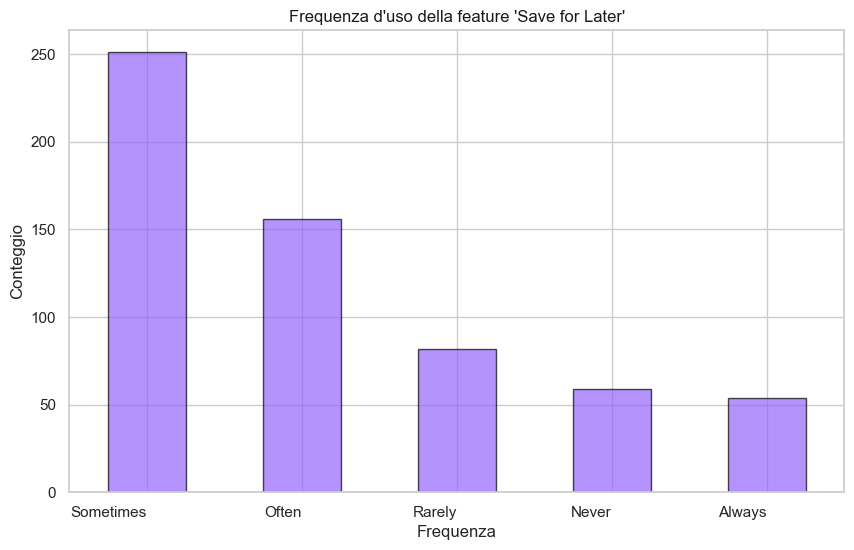

In [36]:
# frequenza d'uso della feature "Save for Later"
saveforlater_counts = dataset['Saveforlater_Frequency'].value_counts()
# Visualizza un grafico a barre
plt.figure(figsize=(10, 6))
saveforlater_counts.plot(kind='bar', color='#9565FB', edgecolor='black', alpha=0.7)
plt.title("Frequenza d'uso della feature 'Save for Later'", color='k')
plt.xlabel('Frequenza')
plt.xticks(rotation=0, ha='right')
plt.ylabel('Conteggio')
plt.show()

C:\Users\Utente\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


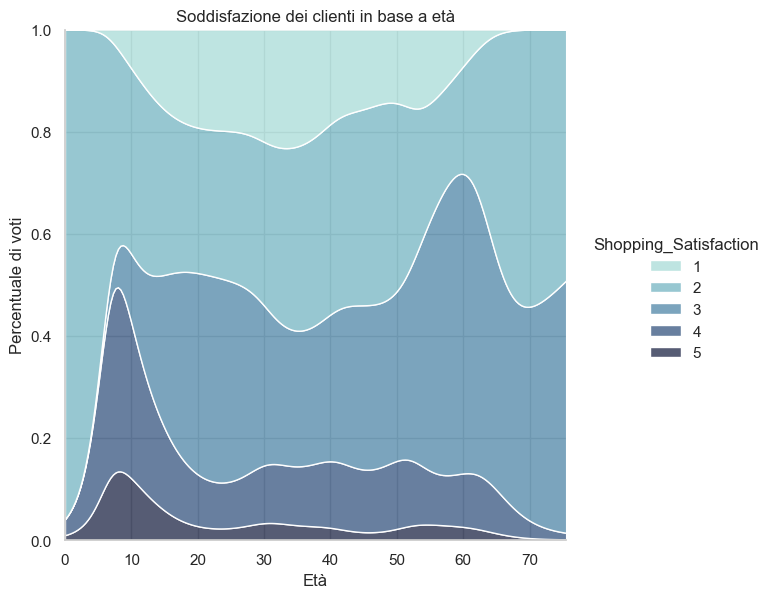

In [40]:
#indice di soddisfazione rigurado all'acquisto, in base all'età
sea.set_theme(style="whitegrid")
sea.displot(data=dataset, x='age', hue='Shopping_Satisfaction', kind="kde", height=6 ,multiple="fill",
clip=(0, None),palette="ch:rot=-.25,hue=1,light=.80")
plt.title('Soddisfazione dei clienti in base a età')
plt.xlabel('Età')
plt.ylabel('Percentuale di voti')
plt.show()
